# Projet d'application en lien avec l'alimentation

Etude data - Projet 3 - Nalron (Octobre 2020) OpenClassrooms / CentraleSupélec

Traitement des données sur Jupyter Notebook (Distribution Anaconda)

Etude réalisée en langage Python

*Data source* : [Open Food Fact](https://fr.openfoodfacts.org/data) - 
*Variables info* : [Open Food Variables](https://world.openfoodfacts.org/data/data-fields.txt)

---

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_rows', 4000)
plt.style.use('ggplot') 
plt.rcParams.update(
    {
     'figure.figsize': (15, 10),
     'axes.labelsize': 15,
     'axes.titlesize':25,
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [3]:
#Loading sample from the last Notebook
df = pd.read_csv('p3_00_data/df.csv',sep='/t', delimiter=';', parse_dates=['created_t', 'last_modified_t'])
df.drop(columns='Unnamed: 0', inplace=True)
df['nova_group'] = df['nova_group'].astype(str)
df.head()

code                                                url  \
0    1938067  http://world-en.openfoodfacts.org/product/0000...   
1    8237798  http://world-en.openfoodfacts.org/product/0000...   
2   12167005  http://world-en.openfoodfacts.org/product/0000...   
3   20045791  http://world-en.openfoodfacts.org/product/0000...   
4  236555909  http://world-en.openfoodfacts.org/product/0000...   

           creator           created_t     last_modified_t  \
0               b7 2017-01-15 17:32:08 2018-12-30 17:08:34   
1               b7 2017-04-11 20:41:47 2017-04-11 21:01:28   
2               b7 2018-04-12 17:16:57 2018-04-12 21:56:47   
3  usda-ndb-import 2017-03-10 08:39:36 2018-12-27 13:08:11   
4  usda-ndb-import 2017-03-09 16:43:21 2020-04-22 20:59:46   

                    product_name              brands  \
0   Chaussons tressés aux pommes  Kirkland Signature   
1                Quiche Lorraine  Kirkland Signature   
2  Brioches roulées avec raisins  Kirkland Signature   
3                         Muffin        Fresh & Easy   
4       Bakers Best, White Bread      Wise Woodworks   

                                          categories   countries_en  \
0  Snacks, Snacks sucrés, Biscuits et gâteaux, Vi...         Canada   
1  Plats préparés, Pizzas tartes salées et quiche...         Canada   
2  Snacks, Snacks sucrés, Biscuits et gâteaux, Pâ...         Canada   
3  Snacks, Sweet snacks, Biscuits and cakes, Cake...  United States   
4  Plant-based foods and beverages, Plant-based f...  United States   

                                    ingredients_text  ...  sugars_100g  \
0  Pâte (farine, margarines d'huile de palme et d...  ...       24.700   
1  INGRÉDIENTS : GARNITURE (SUBSTANCES LAITIÈRES....  ...        0.714   
2  INGRÉDIENTS ; BRIOCHE (FARINE, EAU, RAISINS SE...  ...       19.000   
3  Wheatflour, sugar, eggs, soybean oil, water, c...  ...       32.940   
4  Enriched bleached flour (wheat flour, malt bar...  ...        5.880   

  fiber_100g  proteins_100g  salt_100g sodium_100g vitamin_a_100g  \
0      2.000           3.33     0.6470     0.25900       0.000000   
1      0.357           5.36     0.4990     0.20000       0.000011   
2      1.000           7.00     0.0000     0.00000       0.000000   
3      2.400           5.88     0.6731     0.26924       0.000035   
4      2.900           8.82     1.2500     0.50000       0.000000   

  vitamin_c_100g calcium_100g iron_100g nutrition_score_fr_100g  
0       0.001600       0.0133  0.000480                     9.0  
1       0.000429       0.0286  0.000643                     2.0  
2       0.000000       0.0000  0.000000                     0.0  
3       0.000000       0.0880  0.001590                    17.0  
4       0.000000       0.0000  0.003180                     0.0  

[5 rows x 38 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10521 entries, 0 to 10520
Data columns (total 38 columns):
code                                       10521 non-null int64
url                                        10521 non-null object
creator                                    10521 non-null object
created_t                                  10521 non-null datetime64[ns]
last_modified_t                            10521 non-null datetime64[ns]
product_name                               10521 non-null object
brands                                     6756 non-null object
categories                                 10521 non-null object
countries_en                               10521 non-null object
ingredients_text                           10521 non-null object
additives_n                                10521 non-null float64
additives_en                               10521 non-null object
ingredients_from_palm_oil_n                10521 non-null float64
ingredients_that_may_be_from_p

In [8]:
df.describe()

code   additives_n  ingredients_from_palm_oil_n  \
count  1.052100e+04  10521.000000                 10521.000000   
mean   1.334028e+10      4.340272                     0.000095   
std    3.235258e+09      3.940670                     0.009749   
min    1.089400e+04      1.000000                     0.000000   
25%    1.114087e+10      1.000000                     0.000000   
50%    1.125990e+10      3.000000                     0.000000   
75%    1.590007e+10      6.000000                     0.000000   
max    2.013815e+10     32.000000                     1.000000   

       ingredients_that_may_be_from_palm_oil_n   energy_100g      fat_100g  \
count                             10521.000000  10521.000000  10521.000000   
mean                                  0.082217   1209.771647     12.558109   
std                                   0.281205    665.263502     13.011682   
min                                   0.000000      0.000000      0.000000   
25%                                   0.000000    598.000000      1.790000   
50%                                   0.000000   1259.000000      9.210000   
75%                                   0.000000   1674.000000     20.000000   
max                                   2.000000   3628.000000    100.000000   

       saturated_fat_100g  trans_fat_100g  cholesterol_100g  \
count        10521.000000    10521.000000      10521.000000   
mean             5.008471        0.066644          0.035732   
std              6.657148        0.749708          1.189324   
min              0.000000        0.000000          0.000000   
25%              0.000000        0.000000          0.000000   
50%              2.630000        0.000000          0.002000   
75%              7.140000        0.000000          0.028000   
max             38.890000       21.430000        116.915000   

       carbohydrates_100g   sugars_100g    fiber_100g  proteins_100g  \
count        10521.000000  10521.000000  10521.000000   10521.000000   
mean            38.049340     18.092211      2.023367       6.961966   
std             27.845506     19.678603      3.056832       7.288257   
min              0.000000      0.000000      0.000000       0.000000   
25%             10.870000      2.650000      0.000000       2.560000   
50%             33.330000      9.000000      1.100000       5.000000   
75%             63.640000     30.190000      2.900000       9.300000   
max            100.000000    100.000000     46.700000      79.050000   

          salt_100g   sodium_100g  vitamin_a_100g  vitamin_c_100g  \
count  10521.000000  10521.000000    10521.000000    10521.000000   
mean       1.299803      0.519921        0.000097        0.004924   
std        2.795473      1.118189        0.000222        0.021077   
min        0.000000      0.000000        0.000000        0.000000   
25%        0.325000      0.130000        0.000000        0.000000   
50%        0.862500      0.345000        0.000000        0.000000   
75%        1.560000      0.624000        0.000106        0.002000   
max       88.637500     35.455000        0.005000        0.428600   

       calcium_100g     iron_100g  nutrition_score_fr_100g  
count  10521.000000  10521.000000             10521.000000  
mean       0.087996      0.001865                11.336945  
std        0.153693      0.013450                 8.511324  
min        0.000000      0.000000               -11.000000  
25%        0.000000      0.000000                 4.000000  
50%        0.036000      0.000860                13.000000  
75%        0.111000      0.002110                18.000000  
max        1.905000      1.333330                34.000000

In [9]:
nutrition_features = df.iloc[:, 22:].columns
scoring_features = ['nutriscore_grade', 'nova_group']

## Analyse statistique univariée

### Origines des données par l'étude des contributeurs identifiés

In [53]:
def count_data(data, variable):
    data_creator = pd.DataFrame(round((data.groupby(variable)['code'].count()/len(data)*100), 2)
                                .sort_values(ascending=False)).reset_index()
    data_creator.columns = [variable, 'percentage']
    return data_creator

df_creator = count_data(df, 'creator')
df_creator

creator  percentage
0              usda-ndb-import       61.39
1            org-database-usda       34.23
2   openfoodfacts-contributors        1.44
3                      kiliweb        1.16
4                    foodvisor        0.31
5                      tacinte        0.23
6                waistline-app        0.19
7                     stephane        0.15
8                       bdwyer        0.12
9                   veganeamos        0.11
10             date-limite-app        0.07
11                       kp757        0.06
12                          b7        0.05
13                        toni        0.03
14                   bredowmax        0.03
15                      roblaw        0.02
16            sandrine-chappet        0.02
17                        bori        0.02
18                       eryte        0.02
19                      tacite        0.02
20               recipekeepapp        0.02
21                       npike        0.02
22                  agamitsudo        0.02
23                  foodviewer        0.01
24                      elcoco        0.01
25                  davidflint        0.01
26                    cosmilok        0.01
27                        aeon        0.01
28                danielablush        0.01
29                    chombito        0.01
30                      agnoly        0.01
31                  gappleto97        0.01
32                 big-brother        0.01
33                   yskyflyer        0.01
34            halal-app-chakib        0.01
35                       jibec        0.01
36                thibaut75011        0.01
37                    teamfive        0.01
38                    schalken        0.01
39                   poperigby        0.01
40                       petri        0.01
41                  peterbeard        0.01
42                 pabloviquez        0.01
43            openfoodfactsmx3        0.01
44            openfoodfactsmx2        0.01
45              omnomnotes-app        0.01
46                   medcoco11        0.01
47                     marilyn        0.01
48                   josephp27        0.01
49                  joseph2019        0.01
50                      jolg42        0.01
51               aaronasachimp        0.01

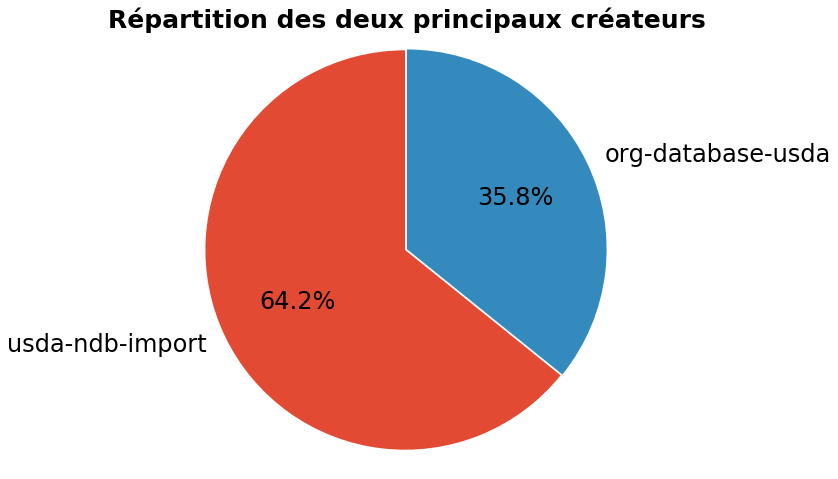

In [56]:
explode = (0.01, 0)
labels = df_creator[df_creator['percentage'] > 2].creator
sizes = df_creator[df_creator['percentage'] > 2].percentage

fig1, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, 
       startangle=90, textprops={'fontsize': 24})

ax.axis('equal') 
plt.title('Répartition des deux principaux créateurs')

plt.savefig("p3_00_graphic/piechart_creator.png")
plt.show()

**Plus de 99% des contributeurs se résument à seulement deux acteurs**, à savoir usda-ndb-import et org-database-usda. openfoodfacts-contributors répond à moins de 2% dans ce contexte.

usda-ndb-import : **FoodData Central**\
org-database-usda : **USDA Open Data Catalog** \
Gestion directement exercée par le département de l'Agriculture Américaine (U.S. DEPARTMENT OF AGRICULTURE
Agricultural Research Service). Les principales sources de nos données sont totalement fiables, il était important de le vérifier.

### Répartition du Nutri-score selon le grade système de A à E
La variable 'nutriscore_grade' est la variable cible de l'échantillon, l'objectif est de comprendre sa composition, sa distribution, les éventuelles corrélations… 

In [57]:
df_grade = count_data(df, 'nutriscore_grade')
df_grade['nutriscore_grade'] = df_grade['nutriscore_grade'].str.upper()
df_grade

nutriscore_grade  percentage
0                D       37.92
1                E       22.76
2                C       17.98
3                A       10.73
4                B       10.60

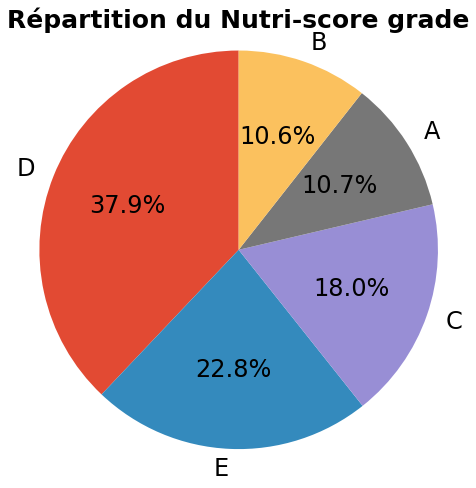

In [58]:
labels = df_grade['nutriscore_grade']
sizes = df_grade['percentage']

fig1, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops={'fontsize': 24})
ax.axis('equal') 
plt.title('Répartition du Nutri-score grade')

plt.savefig("p3_00_graphic/piechart_nutrigrade.png")
plt.show()

**L'échantillon n'a pas une répartition équitable des grades du Nutri-score.** La part des grades D et E (qualité nutritionnelle médiocre), représente 60% des observations. *Suivant le découpe du jeu d'entrainement / test, une modélisation pourrait être biaisée par la répartition de nos individus.*

### Répartition du Nova groupe

In [59]:
df_nova = count_data(df, 'nova_group')
df_nova

nova_group  percentage
0        4.0       90.23
1        3.0        8.25
2        1.0        1.51
3        2.0        0.01

Plus de 90% des produits sont classés en groupe 4, donc produits très transformés… Ce qui est totalement normal compte tenu de la répartition du Nutri-score grade identifiée juste avant.

### Pourcentage du Nutri-score /100g de produit

In [60]:
df.nutrition_score_fr_100g.unique()

array([  9.,   2.,   0.,  17.,  11.,  12.,  25.,  24.,  27.,  21.,  23.,
         8.,  -2.,  13.,  10.,  20.,  19.,  15.,  16.,  -6.,  -4.,   3.,
        22.,   1.,  26.,  28.,  14.,   7.,  18.,   5.,  -3.,  -1.,  30.,
        29.,   4.,   6.,  -5.,  -9.,  -8.,  -7., -10.,  33.,  31.,  34.,
       -11.])

Des valeurs de -11 à +34… l'échantillon a-t-il une plus forte représentation sur un score en particulier?

In [61]:
df_nutriscore = pd.DataFrame(count_data(df, 'nutrition_score_fr_100g'))
df_nutriscore   

nutrition_score_fr_100g  percentage
0                      14.0        6.82
1                      13.0        5.60
2                      16.0        5.43
3                      15.0        4.82
4                      11.0        4.26
5                      12.0        4.07
6                      18.0        3.93
7                       2.0        3.92
8                      17.0        3.64
9                      19.0        3.46
10                      0.0        3.42
11                     20.0        3.28
12                      3.0        3.25
13                      1.0        3.21
14                     21.0        2.88
15                     -1.0        2.82
16                      4.0        2.81
17                     10.0        2.66
18                     23.0        2.55
19                     24.0        2.41
20                     22.0        2.25
21                     -3.0        2.21
22                     -2.0        2.19
23                      6.0        2.09
24                      9.0        2.07
25                     25.0        2.04
26                      5.0        2.01
27                      7.0        1.81
28                      8.0        1.78
29                     -4.0        1.75
30                     26.0        1.44
31                     -5.0        1.09
32                     27.0        0.69
33                     -6.0        0.29
34                     28.0        0.28
35                     -7.0        0.19
36                     29.0        0.17
37                    -10.0        0.10
38                     30.0        0.10
39                     -8.0        0.10
40                     -9.0        0.05
41                     31.0        0.03
42                     33.0        0.02
43                     34.0        0.01
44                    -11.0        0.01

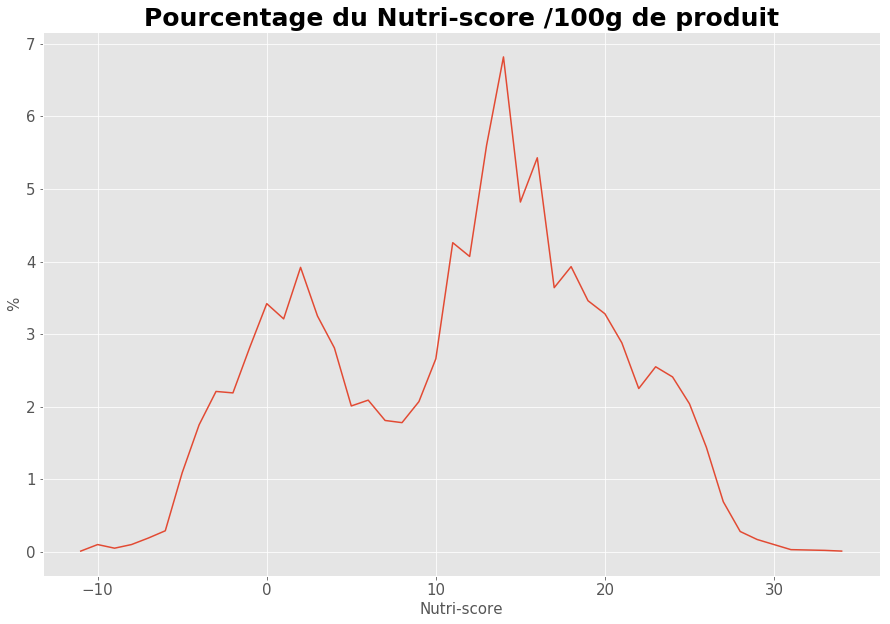

In [62]:
sns.lineplot(x='nutrition_score_fr_100g', y= 'percentage', data=df_nutriscore)
plt.title('Pourcentage du Nutri-score /100g de produit')
plt.xlabel('Nutri-score')
plt.ylabel('%')
plt.show()

Un premier aperçu du comportement des individus du Nutri-score dans l'échantillon. Aucune forte présence d'une observation par rapport à une autre, le pourcentage le plus haut ne dépasse pas les 7%. Notons qu'une forme binomiale semble ressortir, cette intuition sera par la suite analysée plus en détail.

### Analyse des correspondances 'nutriscore_grade' / 'nutrition_score_fr_100g'

In [63]:
pd.set_option('display.max_colwidth', 100)
pd.DataFrame(df.groupby(by='nutriscore_grade')['nutrition_score_fr_100g'].unique()).reset_index()

nutriscore_grade  \
0                a   
1                b   
2                c   
3                d   
4                e   

                                                                               nutrition_score_fr_100g  
0                                 [-2.0, -6.0, -4.0, -3.0, -1.0, -5.0, -9.0, -8.0, -7.0, -10.0, -11.0]  
1                                                                                [2.0, 0.0, 1.0, -3.0]  
2                                                       [9.0, 8.0, 10.0, 3.0, 7.0, 5.0, 4.0, 6.0, 2.0]  
3                                 [17.0, 11.0, 12.0, 13.0, 15.0, 16.0, 14.0, 18.0, 9.0, 6.0, 7.0, 8.0]  
4  [25.0, 24.0, 27.0, 21.0, 23.0, 20.0, 19.0, 22.0, 26.0, 28.0, 30.0, 29.0, 17.0, 13.0, 16.0, 14.0,...

La connaissance du Nutrition-score en rapport avec le grade est très importante. En modélisation si le Nutrition-score est pris comme target de prédiction, le grade sera alors identifié automatiquement. Ci-dessous une confirmation des résultats trouvés…
![Nutrition-score grade](p3_00_image/nutriscore_grade.jpg)

Un test de Chi2 sera utilisé pour tester l'hypothèse nulle (H0) d'absence de relation entre deux variables catégorielles, ce test vérifie donc l'hypothèse d'indépendance de ces variables.

### Affichage des groupes liés au PNNS 
La mise en place d’une politique nutritionnelle est apparue, au cours des quinze dernières années, comme une priorité de santé publique. Le rôle joué par la nutrition comme facteur de protection ou de risque des pathologies les plus répandues en France est de mieux en mieux compris, qu’il s’agisse du cancer, des maladies cardiovasculaires de l’obésité, de l’ostéoporose ou du diabète de type 2.

L’amélioration de l’état nutritionnel de la population constitue un enjeu majeur pour les politiques de santé publique menées en France, en Europe et dans le monde.

In [64]:
def country_list(data, country_variable):
    country_tags = {}
    for i in data.index:
        tags = str(data.at[i, country_variable]).split(",")
        for tag in tags:
            if tag in country_tags:
                country_tags[tag] += 1
            else:
                country_tags[tag] = 1

    sorted_labels_tags = sorted(country_tags, key=country_tags.get, reverse=True)

    for tag in sorted_labels_tags[:]:
        print(f"{tag}: {country_tags[tag]}")
        
        
display(country_list(df, 'pnns_groups_1'))
display(country_list(df, 'pnns_groups_2'))

unknown: 2897
Sugary snacks: 2314
Cereals and potatoes: 1053
Milk and dairy products: 1002
Composite foods: 901
Fat and sauces: 765
Fish Meat Eggs: 706
Fruits and vegetables: 434
Beverages: 290
Salty snacks: 90
fruits-and-vegetables: 67
sugary-snacks: 2


None

unknown: 2897
Biscuits and cakes: 1418
Sweets: 820
Dressings and sauces: 698
One-dish meals: 681
Cereals: 597
Cheese: 547
Milk and yogurt: 376
Processed meat: 349
Bread: 348
Vegetables: 301
Meat: 182
Fish and seafood: 167
Pizza pies and quiche: 160
Fruits: 128
Sweetened beverages: 114
Plant-based milk substitutes: 78
Chocolate products: 76
Ice cream: 75
Appetizers: 70
Fats: 67
vegetables: 67
Sandwiches: 60
Legumes: 50
Artificially sweetened beverages: 50
Unsweetened beverages: 44
Breakfast cereals: 37
Potatoes: 21
Salty and fatty products: 12
Nuts: 8
Eggs: 8
Dried fruits: 4
Dairy desserts: 4
Teas and herbal teas and coffees: 3
pastries: 2
Fruit juices: 1
Soups: 1


None

Mettons ces détails de côté, les deux variables 'PNNS' sont intéressantes d'un point vue informatif, mais peut-être pas directement utiles dans le traitement de notre problématique.**Ceci étant, voyons maintenant le corpus de nos variables nutritionnelles, fil conducteur de l'analyse.**

### Distribution des variables quantitatives nutritionnelles
Ce corpus de variables, ayant pour terminaison '_100g', sera traité au cas par cas dans une première partie. Ici, il sera question de mieux comprendre leur distribution, les dispersions, les principales statistiques descriptives, etc… La finalité est de pouvoir exploiter, dans une seconde étape multivariée, les éventuelles corrélations, le cas échéant l'échantillon sera ré-optimisé pour faciliter les essais de modélisation.

In [65]:
df[nutrition_features].describe(include='all').T

count         mean         std   min      25%  \
energy_100g              10521.0  1209.771647  665.263502   0.0  598.000   
fat_100g                 10521.0    12.558109   13.011682   0.0    1.790   
saturated_fat_100g       10521.0     5.008471    6.657148   0.0    0.000   
trans_fat_100g           10521.0     0.066644    0.749708   0.0    0.000   
cholesterol_100g         10521.0     0.035732    1.189324   0.0    0.000   
carbohydrates_100g       10521.0    38.049340   27.845506   0.0   10.870   
sugars_100g              10521.0    18.092211   19.678603   0.0    2.650   
fiber_100g               10521.0     2.023367    3.056832   0.0    0.000   
proteins_100g            10521.0     6.961966    7.288257   0.0    2.560   
salt_100g                10521.0     1.299803    2.795473   0.0    0.325   
sodium_100g              10521.0     0.519921    1.118189   0.0    0.130   
vitamin_a_100g           10521.0     0.000097    0.000222   0.0    0.000   
vitamin_c_100g           10521.0     0.004924    0.021077   0.0    0.000   
calcium_100g             10521.0     0.087996    0.153693   0.0    0.000   
iron_100g                10521.0     0.001865    0.013450   0.0    0.000   
nutrition_score_fr_100g  10521.0    11.336945    8.511324 -11.0    4.000   

                                50%          75%         max  
energy_100g              1259.00000  1674.000000  3628.00000  
fat_100g                    9.21000    20.000000   100.00000  
saturated_fat_100g          2.63000     7.140000    38.89000  
trans_fat_100g              0.00000     0.000000    21.43000  
cholesterol_100g            0.00200     0.028000   116.91500  
carbohydrates_100g         33.33000    63.640000   100.00000  
sugars_100g                 9.00000    30.190000   100.00000  
fiber_100g                  1.10000     2.900000    46.70000  
proteins_100g               5.00000     9.300000    79.05000  
salt_100g                   0.86250     1.560000    88.63750  
sodium_100g                 0.34500     0.624000    35.45500  
vitamin_a_100g              0.00000     0.000106     0.00500  
vitamin_c_100g              0.00000     0.002000     0.42860  
calcium_100g                0.03600     0.111000     1.90500  
iron_100g                   0.00086     0.002110     1.33333  
nutrition_score_fr_100g    13.00000    18.000000    34.00000

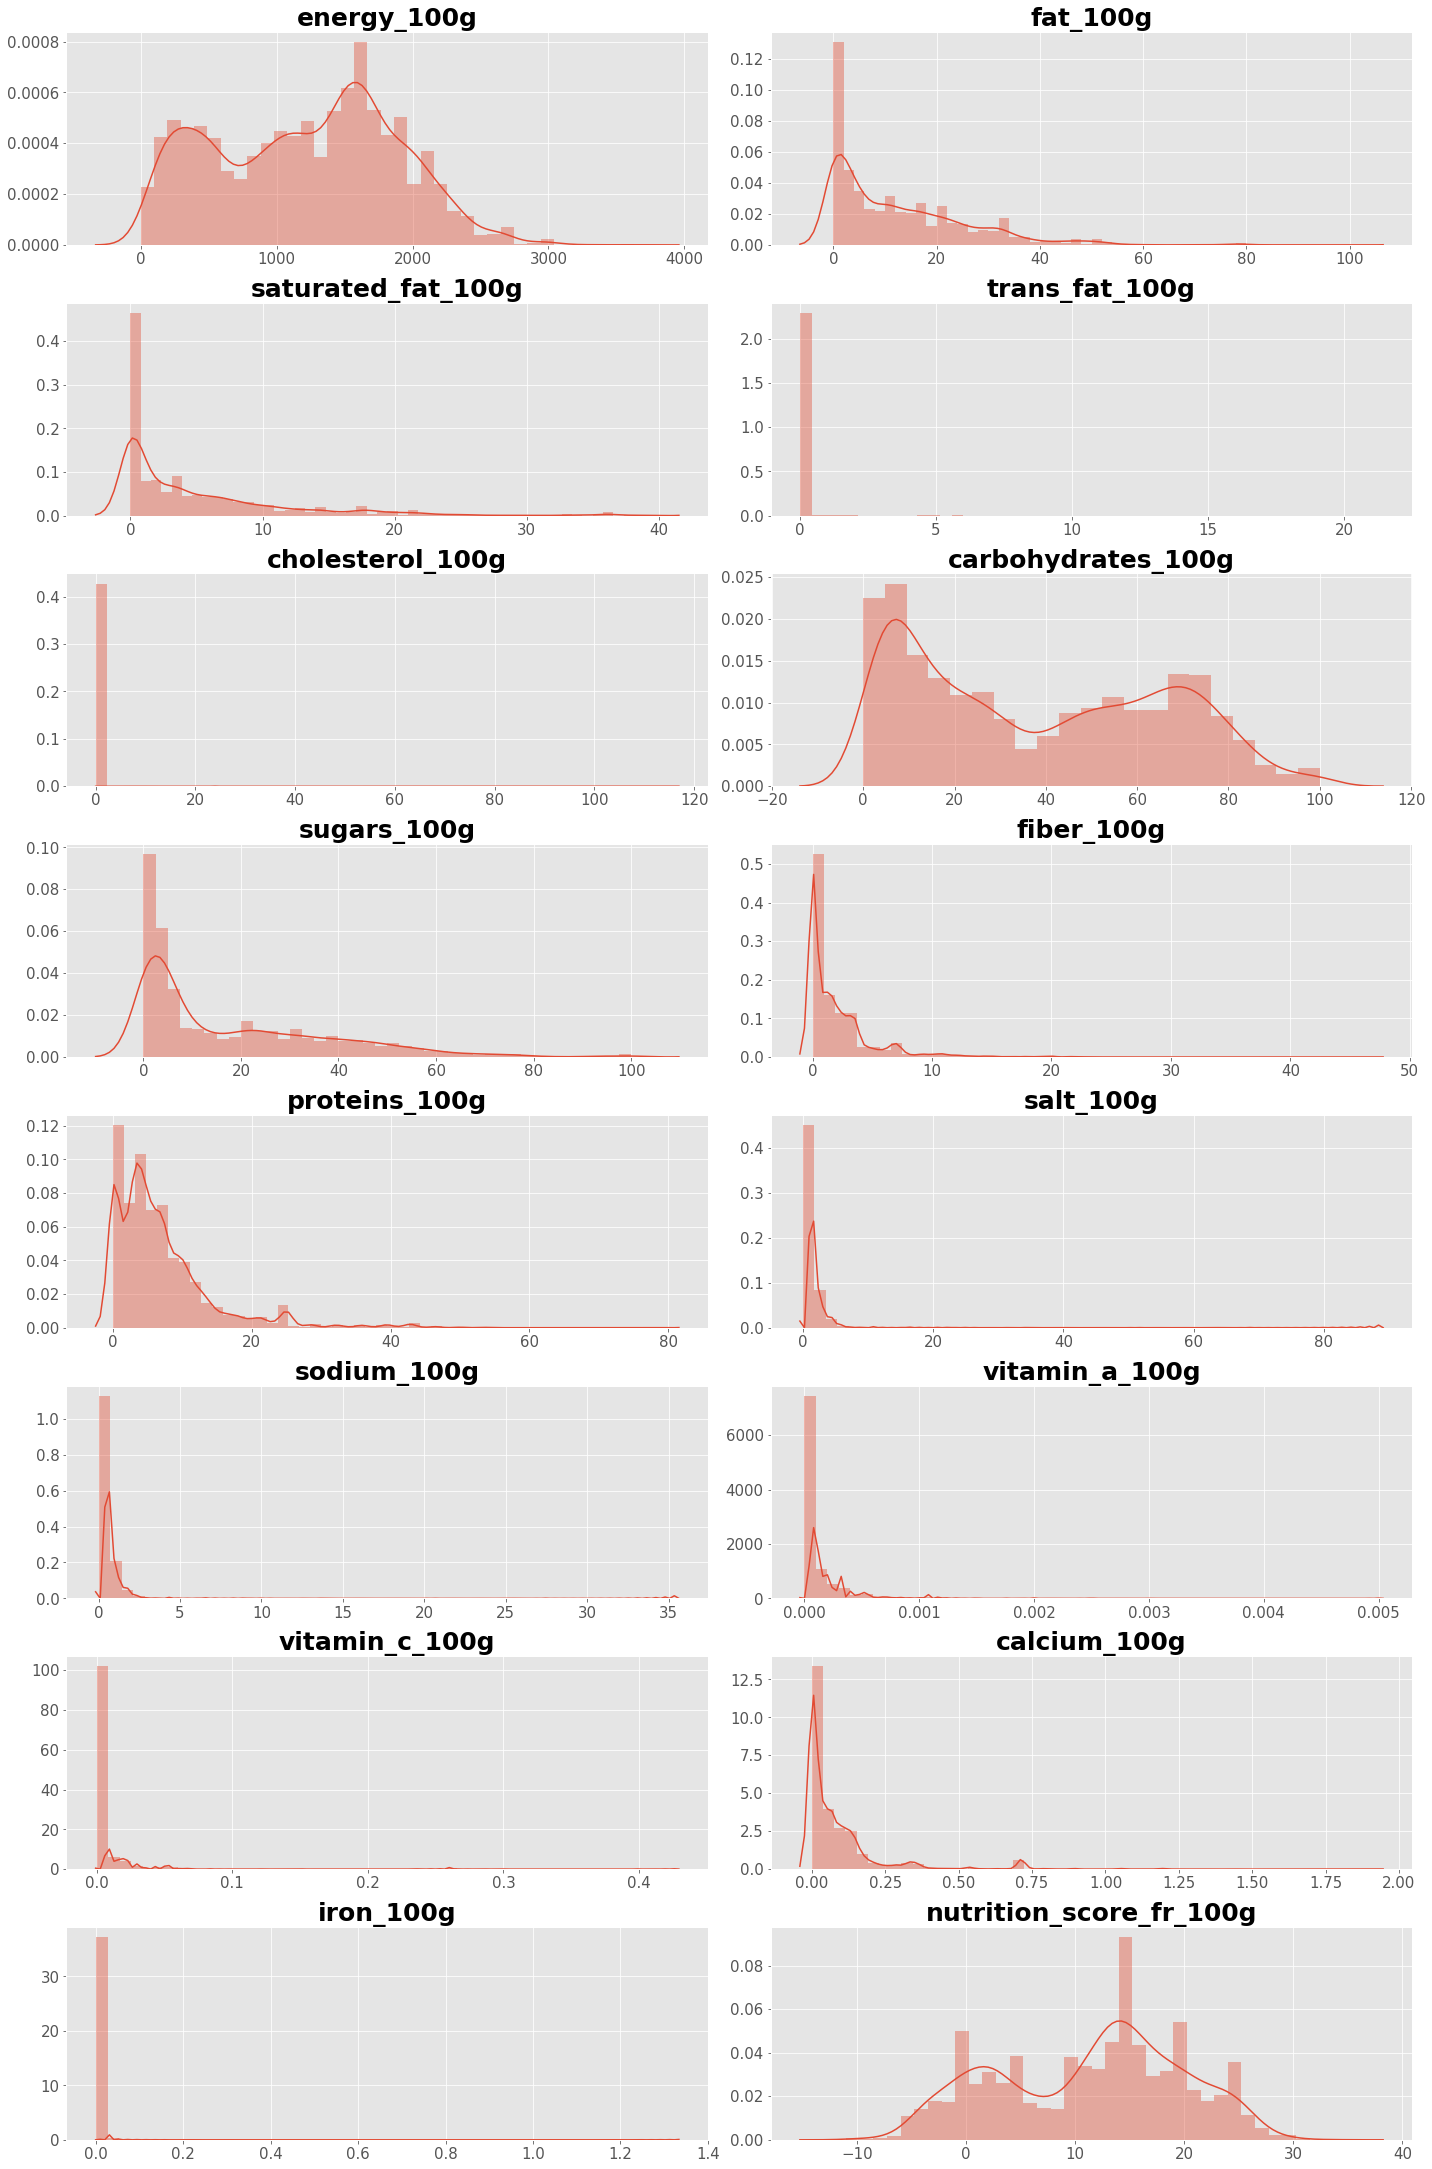

In [67]:
plt.figure(figsize=(20,60))
for i, column in enumerate(nutrition_features):
    plt.subplot(len(nutrition_features),2,i+1)
    sns.distplot(df[nutrition_features][column], kde=True)
    plt.title(column, fontweight="bold", fontsize=25)
    plt.xlabel('')

plt.tight_layout()
plt.savefig('p3_00_graphic/nutri_distribution.png')
plt.show()

**Les distributions de nos variables nutritionnelles ne semblent pas suivre une loi normale.** Le Nutri-score est représenté par une distribution binomiale, également sur deux autres variables carbohydrates_100g et similitude sur energy_100g, la plupart des distributions sont asymétriques, etc… Il ne semble pas nécessaire d'aller plus loin sur l'étude graphique de ces distributions, mais si besoin une approche du coefficient d'asymétrie (skewness en anglais) pourrait-être ajoutée pour mesurer la forme. Ici, l'étalement est étalé à droite, les coefficients seront positifs.

Ceci étant, pour en revenir aux distributions, une vérification supplémentaire peut être pratiquée par un test de Kolmogorov-Smirnov pour déterminer par les chiffres si la loi normale est suivie ou pas.

In [68]:
from scipy.stats import kstest
print('p-value des variables selon le test de Kolmogorov-Smirnov…')
for x in df[nutrition_features]:
    print('')
    print(x + ': ' + str(kstest(df[x], 'norm', args=(df[x].mean(), df[x].std()))[1]))
    print('-----------------------------------------------')

p-value des variables selon le test de Kolmogorov-Smirnov…

energy_100g: 4.565855943973866e-50
-----------------------------------------------

fat_100g: 5.19271703998575e-256
-----------------------------------------------

saturated_fat_100g: 0.0
-----------------------------------------------

trans_fat_100g: 0.0
-----------------------------------------------

cholesterol_100g: 0.0
-----------------------------------------------

carbohydrates_100g: 1.0189414911352001e-119
-----------------------------------------------

sugars_100g: 3.9458981773e-314
-----------------------------------------------

fiber_100g: 0.0
-----------------------------------------------

proteins_100g: 1.089241409926047e-263
-----------------------------------------------

salt_100g: 0.0
-----------------------------------------------

sodium_100g: 0.0
-----------------------------------------------

vitamin_a_100g: 0.0
-----------------------------------------------

vitamin_c_100g: 0.0
------------------

L'hypothèse H0 est largement rejetée sur un seuil de test fixé à 5%, toutes les p-valeurs sont bien inférieures à ce seuil. L'intuition de départ établie par les précédents histogrammes est confirmée, **aucune distribution gaussienne n'est suivie sur nos variables nutritionnelles**.

### Dispersion des variables quantitatives nutritionnelles
Un premier passage est proposé sans tenir compte de la répartition des grades du Nutri-score. Une approche globale afin de visualiser le comportement des variables. Cela ne sera pas suffisant, cette visualisation sera accompagnée par une vue en détails tenant compte du Nutri-score grade.

In [69]:
plt.figure(figsize=(20,60))
for i, column in enumerate(nutrition_features):
    plt.subplot(len(nutrition_features),2,i+1)
    sns.boxplot(df[nutrition_features][column], meanline=True, showmeans=True, width=0.5)
    plt.title(column, fontweight="bold", fontsize=25)
    plt.xlabel('')

plt.tight_layout()
plt.savefig('p3_00_graphic/nutri_boxplot.png')
plt.show()

**Brève remarque :**\
Des comportements similaires entre certaines variables, à savoir salt_100g et sodium_100g, fat_100g et saturated_sat_100g semblent ressortir.

Quel est l'impact du Nutri-score grade sur chacune des variables représentatives des informations nutritionnelles?\
A l'aide de Boxplot, visualisons le **comportement du Nutri-score grade sur le corpus des variables nutritionnelles.**

## Analyse statistique multivariée
Les relations entre les variables vient en complément des premières intuitions identifiées précédemment.\
Voyons comment aborder les éventuelles corrélations.

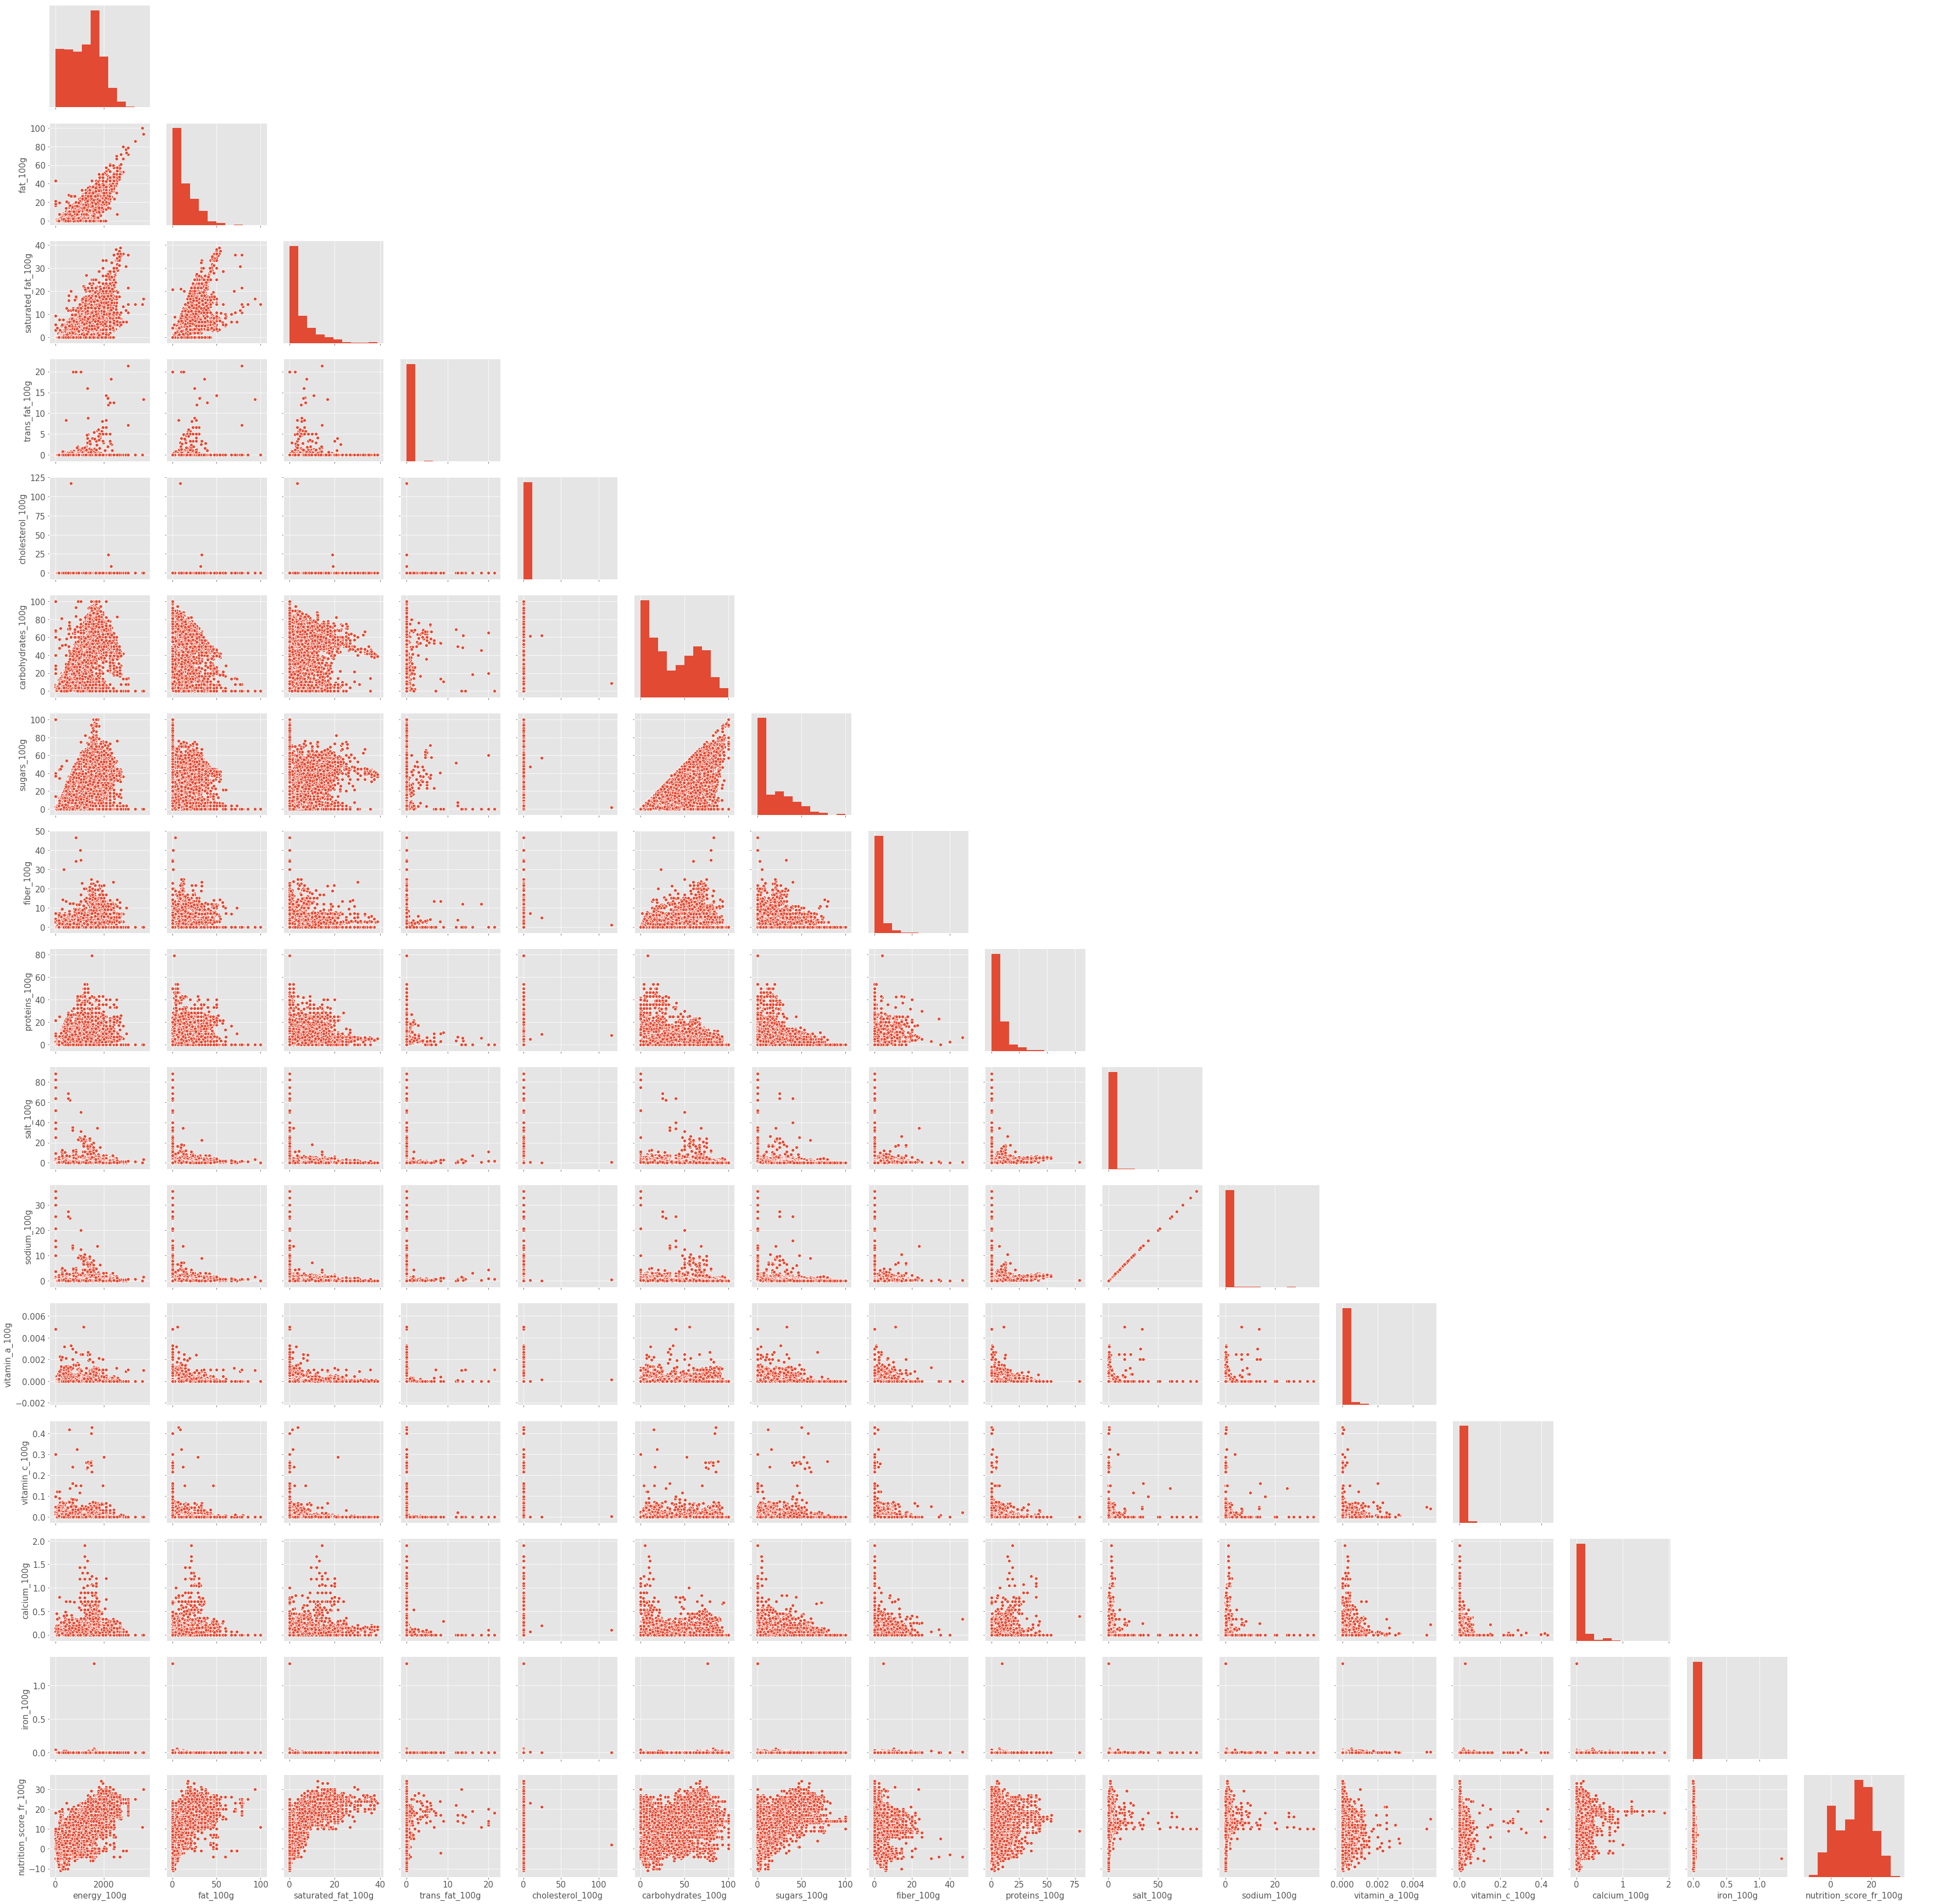

In [70]:
nutri_sample = df.loc[:, df.columns.str.contains('.*_100g.*')]
sns.pairplot(nutri_sample, height=3, corner=True)

plt.savefig("p3_00_graphic/pairplot.png")
plt.show()

In [71]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(df[nutrition_features].corr(),
                     # mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 15})

#add the column names as labels
ax.set_yticklabels(nutrition_features, rotation = 0)
ax.set_xticklabels(nutrition_features)
ax.set_title('Matrice de corrélation de pearson entre les différentes features')
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.savefig('p3_00_graphic/correlation_matrice.png')

In [72]:
df[nutrition_features].corr()

energy_100g  fat_100g  saturated_fat_100g  \
energy_100g                 1.000000  0.730714            0.575039   
fat_100g                    0.730714  1.000000            0.785524   
saturated_fat_100g          0.575039  0.785524            1.000000   
trans_fat_100g              0.067110  0.083584            0.022762   
cholesterol_100g           -0.000118  0.012297            0.016382   
carbohydrates_100g          0.622859 -0.024190           -0.014198   
sugars_100g                 0.450713  0.068138            0.199153   
fiber_100g                  0.285926  0.093579           -0.009569   
proteins_100g               0.177528  0.193168            0.150302   
salt_100g                   0.008397 -0.013380           -0.066062   
sodium_100g                 0.008397 -0.013380           -0.066062   
vitamin_a_100g             -0.024086  0.014830            0.026302   
vitamin_c_100g             -0.054962 -0.136139           -0.129997   
calcium_100g                0.122965  0.198177            0.308068   
iron_100g                   0.062242 -0.020622           -0.033740   
nutrition_score_fr_100g     0.736914  0.624717            0.622085   

                         trans_fat_100g  cholesterol_100g  carbohydrates_100g  \
energy_100g                    0.067110         -0.000118            0.622859   
fat_100g                       0.083584          0.012297           -0.024190   
saturated_fat_100g             0.022762          0.016382           -0.014198   
trans_fat_100g                 1.000000         -0.002101            0.014415   
cholesterol_100g              -0.002101          1.000000           -0.015970   
carbohydrates_100g             0.014415         -0.015970            1.000000   
sugars_100g                    0.017418         -0.004497            0.677764   
fiber_100g                    -0.006026         -0.005369            0.335551   
proteins_100g                 -0.039891          0.016676           -0.200780   
salt_100g                      0.026484         -0.001266           -0.027633   
sodium_100g                    0.026484         -0.001266           -0.027633   
vitamin_a_100g                 0.009212          0.004262           -0.058280   
vitamin_c_100g                -0.016555         -0.005617            0.089759   
calcium_100g                  -0.034553          0.011218           -0.127700   
iron_100g                     -0.002588         -0.001859            0.102503   
nutrition_score_fr_100g        0.054510          0.001149            0.384760   

                         sugars_100g  fiber_100g  proteins_100g  salt_100g  \
energy_100g                 0.450713    0.285926       0.177528   0.008397   
fat_100g                    0.068138    0.093579       0.193168  -0.013380   
saturated_fat_100g          0.199153   -0.009569       0.150302  -0.066062   
trans_fat_100g              0.017418   -0.006026      -0.039891   0.026484   
cholesterol_100g           -0.004497   -0.005369       0.016676  -0.001266   
carbohydrates_100g          0.677764    0.335551      -0.200780  -0.027633   
sugars_100g                 1.000000    0.011496      -0.295335  -0.150338   
fiber_100g                  0.011496    1.000000       0.114235  -0.009401   
proteins_100g              -0.295335    0.114235       1.000000   0.147027   
salt_100g                  -0.150338   -0.009401       0.147027   1.000000   
sodium_100g                -0.150338   -0.009401       0.147027   1.000000   
vitamin_a_100g             -0.087858    0.079837       0.020053   0.092849   
vitamin_c_100g              0.070736    0.005079      -0.110859   0.004485   
calcium_100g               -0.123280    0.029930       0.397113   0.013415   
iron_100g                   0.001865    0.108171       0.039319   0.007811   
nutrition_score_fr_100g     0.518105   -0.088586       0.081503   0.109642   

                         sodium_100g  vitamin_a_100g  vitamin_c_100g  \
energy_100g                 0.008397       -0.024086     

**Identification des corrélations :**
- *nutrition_score_fr_100g :* corrélation avec fat_100g, saturated_fat_100g, sugar_100g, energy_100g
- *energy_100g :* corrélation avec fat_100g, carbohydrates_100g, nutrition-score-fr_100g
- *sugars_100g :* correlation avec carbohydrates_100g

In [73]:
df.drop(columns=['sodium_100g'], inplace=True)

In [74]:
nutrition_features = df.iloc[:, 22:].columns

### Analyse de la variance du Nutri-scode grade vs autres variables quantitatives nutritionnelles
L'ANOVA est exploitée graphiquement à partir de boxplot, mais complétée par les chiffres à l'aide du test de Fisher.

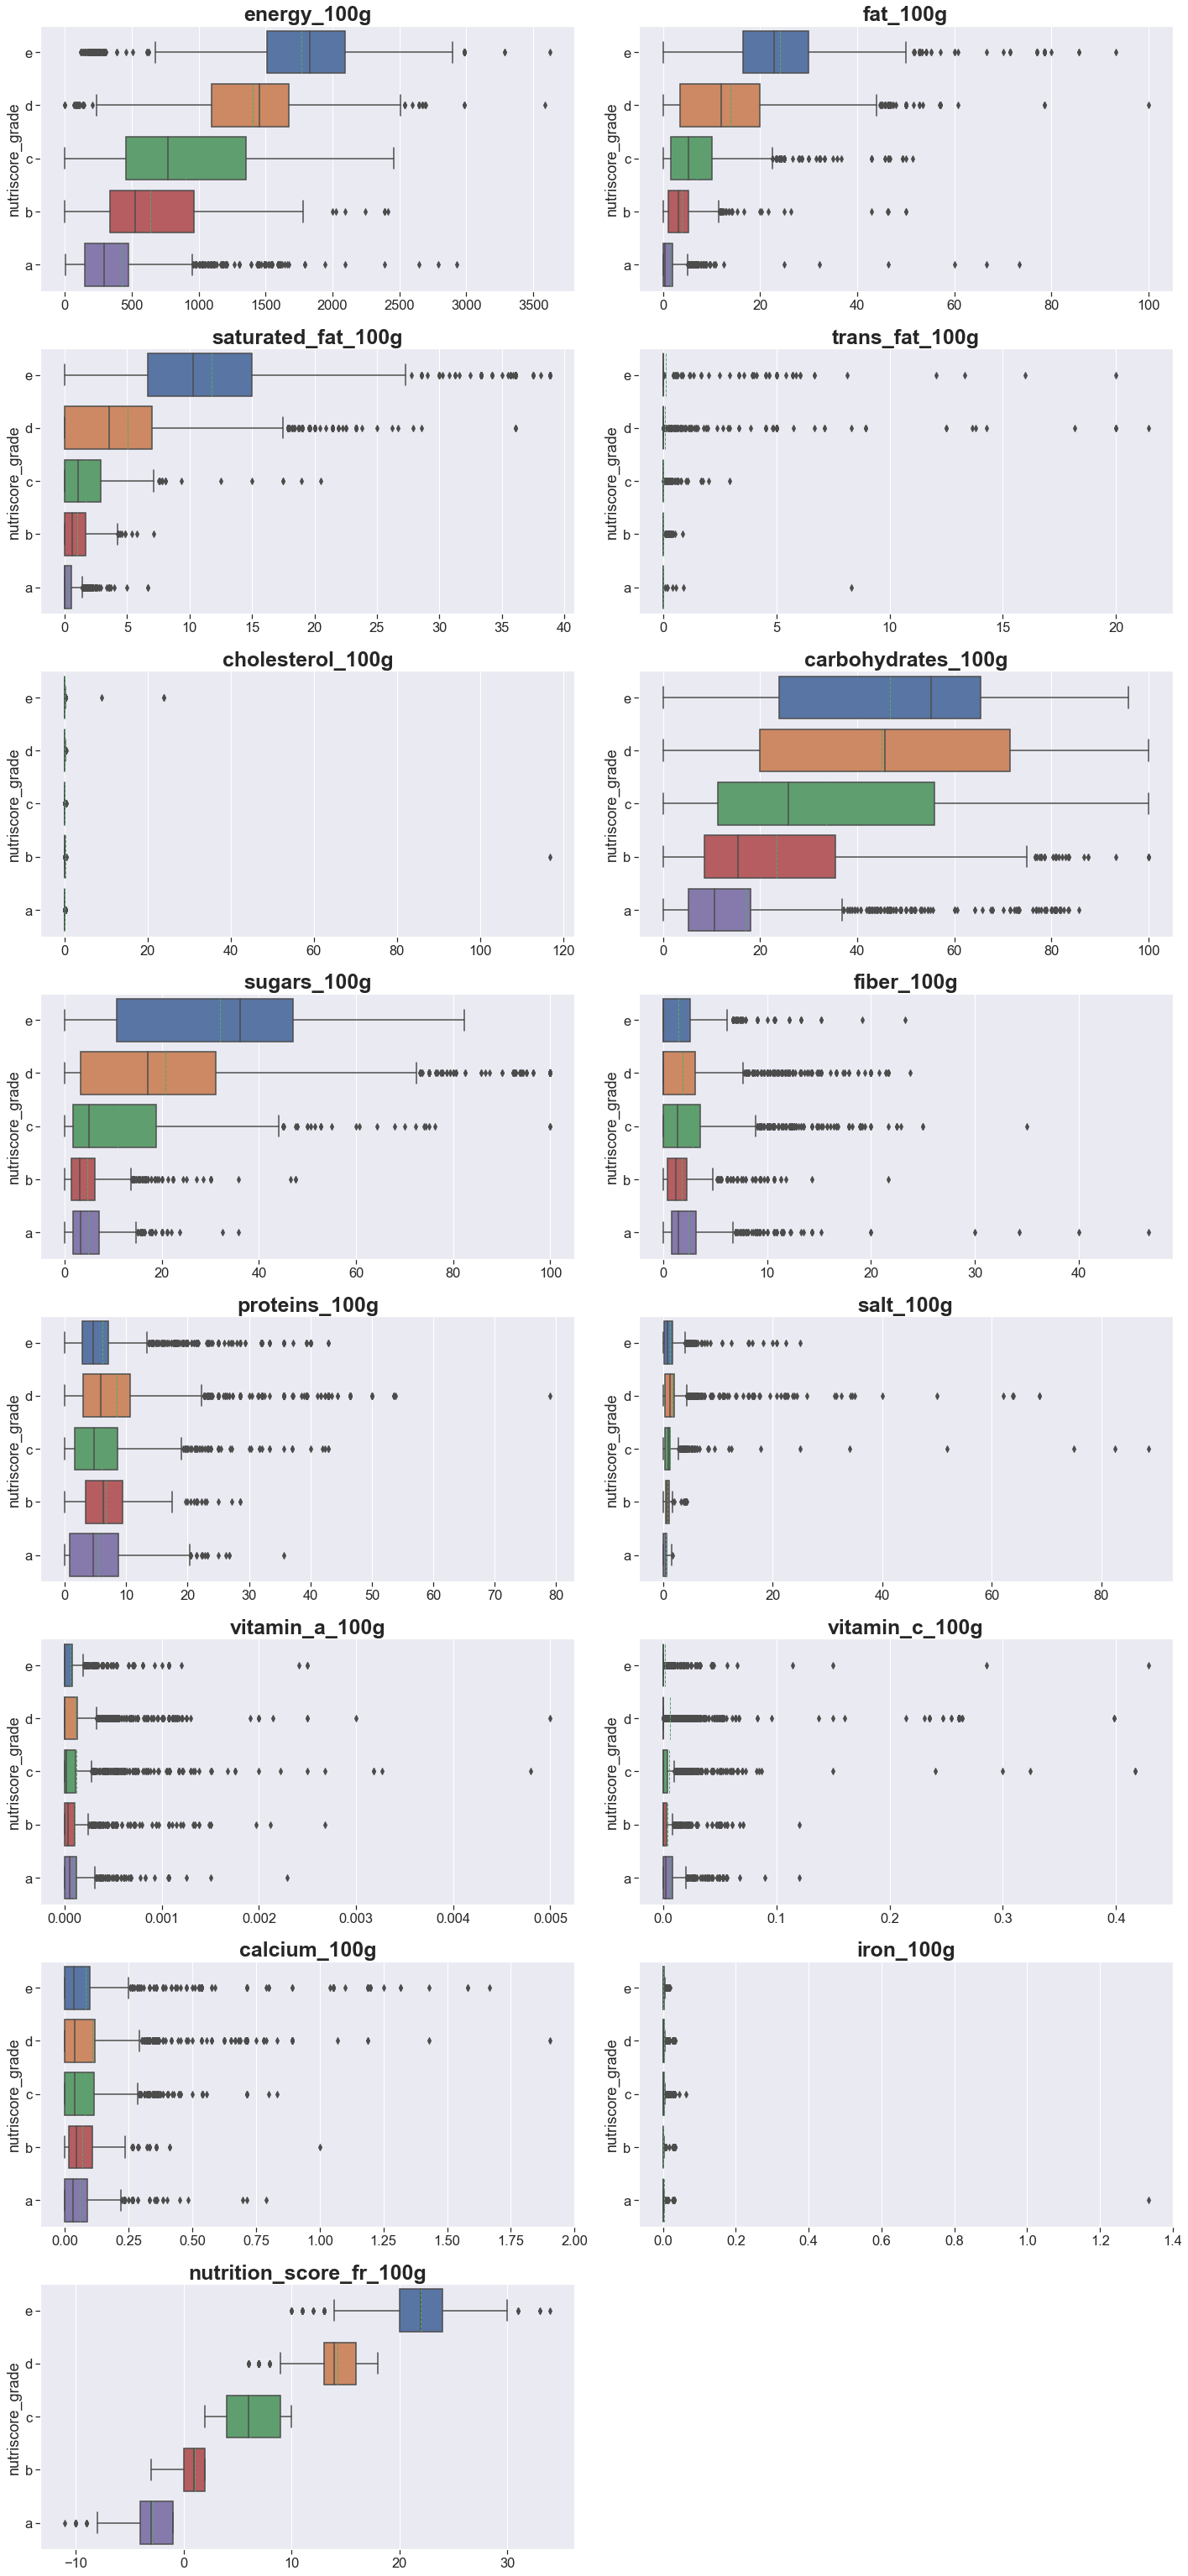

In [75]:
plt.figure(figsize=(20,80))
for i, column in enumerate(df[nutrition_features]):
    plt.subplot(len(df[nutrition_features].columns),2,i+1)
    sns.boxplot(x = df[nutrition_features][column], y = df.loc[:, 'nutriscore_grade']
                .sort_values(ascending=False), meanline=True, showmeans=True, width=0.8)
    plt.title(column, fontweight="bold", fontsize=25)
    plt.xlabel('')

plt.tight_layout()
plt.savefig('p3_00_graphic/nutriscore_grade_boxplot.png')
plt.show()

- La variance est plus marquée pour l'énergie, les graisses, les graisses saturées, les glucides, et le sucre.

- L'ordre de grandeur de ces écarts semble moins significatif pour les fibres, les protéines et le calcium.

- Les variables suivantes semblent n'avoir aucune variance propre au Nutri-score grade : fer, cholestérol, trans fat, Vitamine A et C, sel et sodium.

**Vérifions nos intuitions à l'aide du Test de Fisher**, la représentation graphique ne répond pas totalement aux interrogations posées.

In [76]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
anova_nutriscore_grade = smf.ols('energy_100g~nutriscore_grade', data=df).fit()
print(anova_nutriscore_grade. summary())

                            OLS Regression Results                            
Dep. Variable:            energy_100g   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2217.
Date:                Mon, 09 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:54:32   Log-Likelihood:                -80099.
No. Observations:               10521   AIC:                         1.602e+05
Df Residuals:                   10516   BIC:                         1.602e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               427.37

In [77]:
sm.stats.anova_lm(anova_nutriscore_grade, typ=2)

sum_sq       df            F  PR(>F)
nutriscore_grade  2.130202e+09      4.0  2217.332584     0.0
Residual          2.525693e+09  10516.0          NaN     NaN

**Ici seul le test de Fisher est important.** La p-valeur de ce test est 0.00, inférieure à 5 %.\
On rejette donc l'hypothèse H0 selon laquelle gradeA=gradeB=gradeC=gradeD=gradeE=0.

In [78]:
print('p-value des variables…')
for x in df[nutrition_features] :
    print(x + ': ' + str(smf.ols(x + str('~nutriscore_grade'), data=df).fit().f_pvalue))

p-value des variables…
energy_100g: 0.0
fat_100g: 0.0
saturated_fat_100g: 0.0
trans_fat_100g: 5.245462326685858e-07
cholesterol_100g: 0.12760525770236267
carbohydrates_100g: 0.0
sugars_100g: 0.0
fiber_100g: 5.70353364630666e-52
proteins_100g: 8.114763332698311e-60
salt_100g: 9.006230762005503e-50
vitamin_a_100g: 5.7370139641103375e-25
vitamin_c_100g: 1.1340972298515993e-17
calcium_100g: 3.0171152570648807e-31
iron_100g: 0.13208734871364727
nutrition_score_fr_100g: 0.0


A partir des éléments ci-dessus le constat est simple, seulement deux variables sont sans variance significative par par rapport au grade du Nutri-score : iron_100g et cholesterol_100g. Le test de Fisher de notre corpus de variables nutritionnelles démontre clairement que toutes les p-values sont inférieures au seuil des 5% (à l'exception du fer et du cholestérol).

**Le grade du Nutri-score a donc bien un effet sur les valeurs nutritionnelles**, comme nous en avions l'intuition avec les boîtes à moustaches. Les corrélations seront détaillées dans la partie suivante sur l'analyse multivariée.

### Analyse des variables catégorielles de scoring :   ['nutriscore_grade', 'nova_group']
En début d'analyse le cap était fixé en attribuant deux variables qualitatives aux attentes des utilisateurs.\
Quelles sont ces attentes?

En effet, avoir non seulement le grade du Nutri-score (A, B, C, D ou E), mais également le Nova groupe (1, 2, 3 ou 4).\
Pourquoi le consommateur souhaite-il ce type de double affichage?\
Pour avoir une idée sur la qualité natritionnelle du produit alimentaire, mais également sur son degré de transformation, donc sa "nocivité".

**Mais avons-nous un lien entre le Nutri-score grade et le Nova groupe?**

In [80]:
X = "nova_group"
Y = "nutriscore_grade"
cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name="Total")\
                 .fillna(0).copy().astype(int)
cont

nutriscore_grade     a     b     c     d     e  Total
nova_group                                           
1.0                118     5    26     7     3    159
2.0                  0     1     0     0     0      1
3.0                225   106   177   223   137    868
4.0                786  1003  1689  3760  2255   9493
Total             1129  1115  1892  3990  2395  10521

In [33]:
#khi-2 & p-value 
import scipy.stats as st
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue

(1000.6579215306631, 20, 2.8268196589863586e-199)

L'indice élevé du Chi2 démontre une importance significative entre les occurences théoriques et celles du tableau de contigence. De plus, la comparaison de p-value (2.82e-199) avec notre seuil de significativité (traditionnellement 5%) expose une valeur inférieure au seuil. L'hypothèse nulle est rejetée en faveur de l’hypothèse alternative, il existe donc un **lien entre le grade du Nutri-score et le Nova group.**


*L'hypothèse nulle (H0) d'absence de relation entre nos deux variables catégorielles*

## Cercle des corrélations 
Vérifions ce que donne une projection des variables nutritionnelles sur le premier plan vectoriel…

In [81]:
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition

In [82]:
X = df[nutrition_features].values

In [83]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [84]:
pca = decomposition.PCA(n_components=None)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Le paramètre 'n_components' n'a pas été fixé, il est intéressant d'exploiter les composantes principales en utilisant une aide à la décision, par exemple l'éboulis des valeurs propres, ou encore le critère de Kaiser.

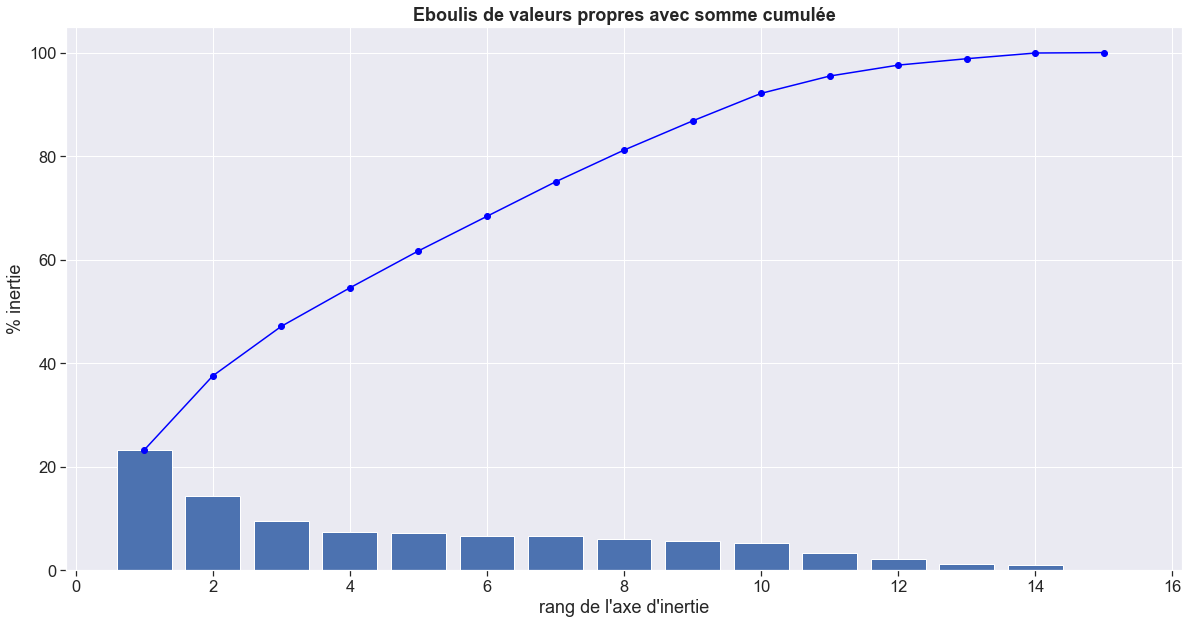

In [85]:
scree = pca.explained_variance_ratio_*100

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="blue",marker='o')
    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("% inertie")
plt.title("Eboulis de valeurs propres avec somme cumulée")

plt.savefig("p3_00_graphic/eboulis_valeurs_propres.png")
plt.show()

In [86]:
eig = pd.DataFrame(
    {
        "Axe" : ["F" + str(x + 1) for x in range(15)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Axe", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"])
eig

Axe  Valeur propre  % variance expliquée  % cum. var. expliquée
0    F1       3.485848                  23.0                   23.0
1    F2       2.147842                  14.0                   38.0
2    F3       1.435725                  10.0                   47.0
3    F4       1.115005                   7.0                   55.0
4    F5       1.070521                   7.0                   62.0
5    F6       1.002798                   7.0                   68.0
6    F7       0.998658                   7.0                   75.0
7    F8       0.920597                   6.0                   81.0
8    F9       0.844932                   6.0                   87.0
9   F10       0.798537                   5.0                   92.0
10  F11       0.501386                   3.0                   95.0
11  F12       0.316722                   2.0                   98.0
12  F13       0.185798                   1.0                   99.0
13  F14       0.164629                   1.0                  100.0
14  F15       0.012428                   0.0                  100.0

L'ACP est normée, la règle de Kaiser détermine les axes > 1 comme étant ceux les plus pertinents. Concrètement les trois premiers plans factoriels (F1 à F6) peuvent être exploités dans l'étude de nos variables. **Soit 68% de la variance expliquée vs 38% sur les deux premières composantes principales (F1 et F2).**

In [126]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            fig, ax = plt.subplots(figsize=(15,15))

            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="r", width=0.005)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', rotation=label_rotation, color="black", alpha=0.5)
            
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

        
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Circle Correlation (F{} - F{})".format(d1+1, d2+1))
        plt.savefig('p3_00_graphic/circle_correlation.png')
        plt.show(block=False)

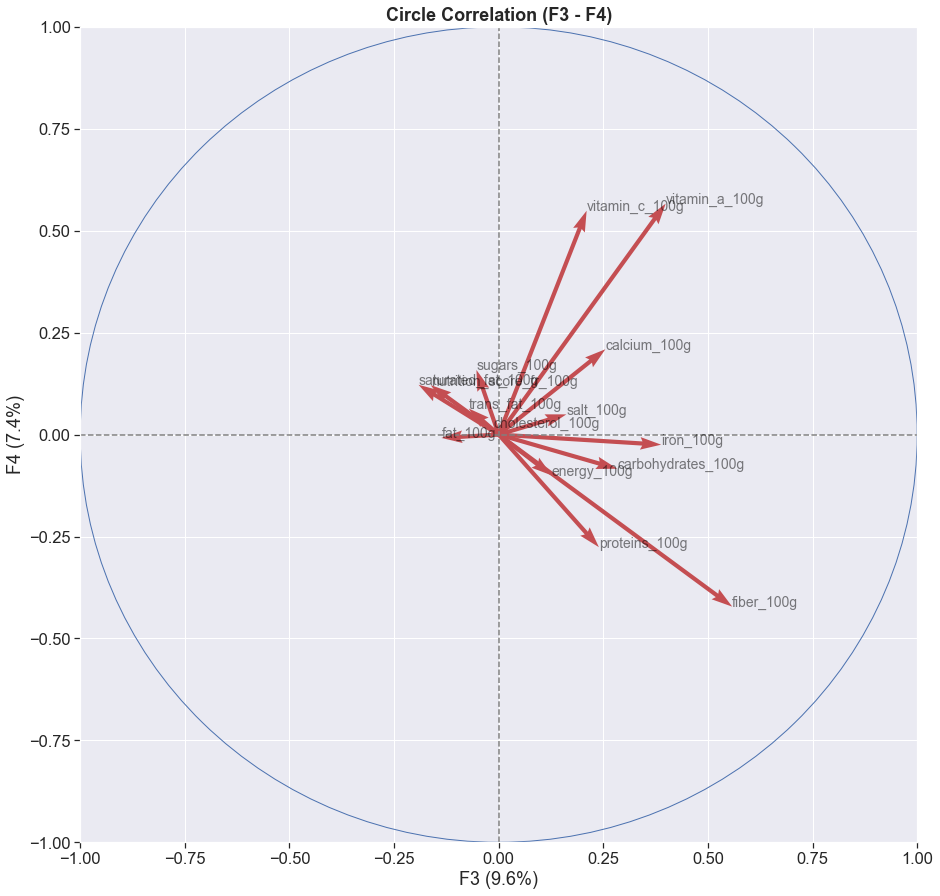

In [127]:
display_circles(pcs=pca.components_, n_comp=6, pca=pca, axis_ranks=[(0,1),(2,3),(4,5)], 
                labels=df.iloc[:, 22:].columns, label_rotation=0, lims=None)

Le premier plan factoriel reste le plus représentatif avec 38% de la variance expliquée. Ce n'est pas surprenant car nous retrouvons une représentation de qualité sur nos principales variables nutritives. Notons également une corrélation exposée par nos flèches les plus proches entre elles, dont l'angle est proche de zéro.

In [128]:
print(pca.explained_variance_ratio_.cumsum())

[0.2323678  0.37554364 0.47124954 0.54557616 0.61693741 0.68378423
 0.7503551  0.8117224  0.86804585 0.92127661 0.95469919 0.975812
 0.98819736 0.99917156 1.        ]


La variance est expliqué à seulement 35,8% sur le premier plan factoriel. La prise en compte du second plan factoriel permet d'expliquer plus de 54% de la variance, ce qui devient acceptable.

Notons des variables très bien expliquée sur la **composante principale F1** : 
- 'carbohydrates_100g'/'sugars_100g' 
- 'energy_100g'/'nutrition_score_fr_100g'
- 'fat_100g'

Sur la **composante principale F2** nous avons :
- 'protein_100g'/'calcium_100g'

In [129]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            fig = plt.figure(figsize=(20,10))
        
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            
            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)

In [130]:
#illustrative_var
rank_band = [df.loc[uni_id, "nutriscore_grade"] for uni_id in range(0,len(X_scaled))]

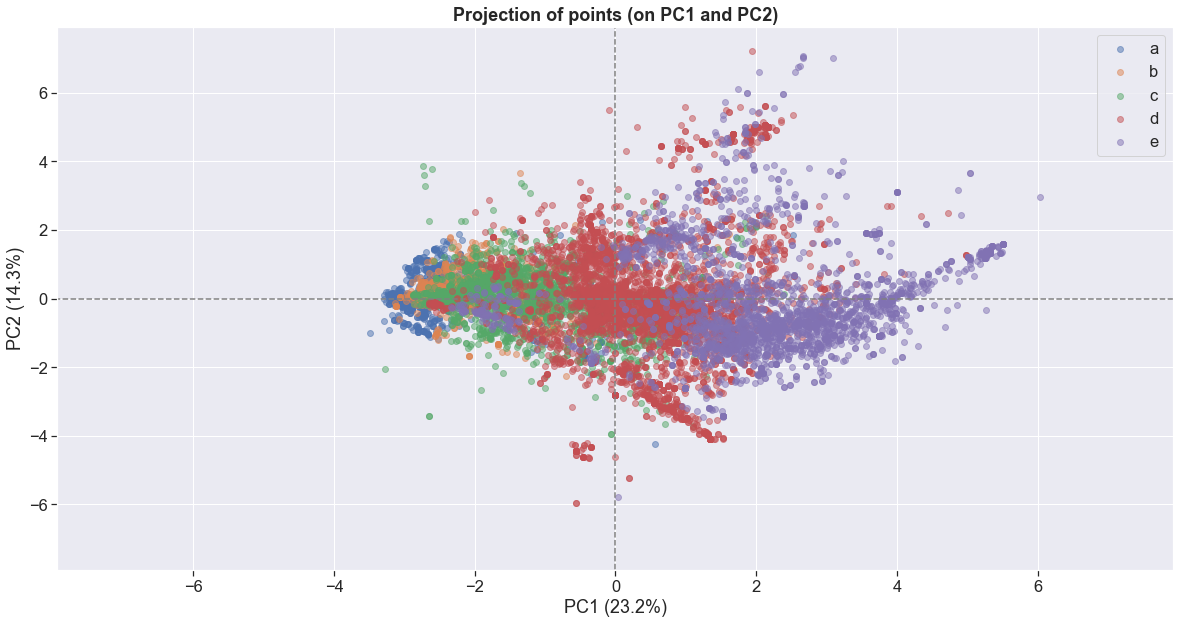

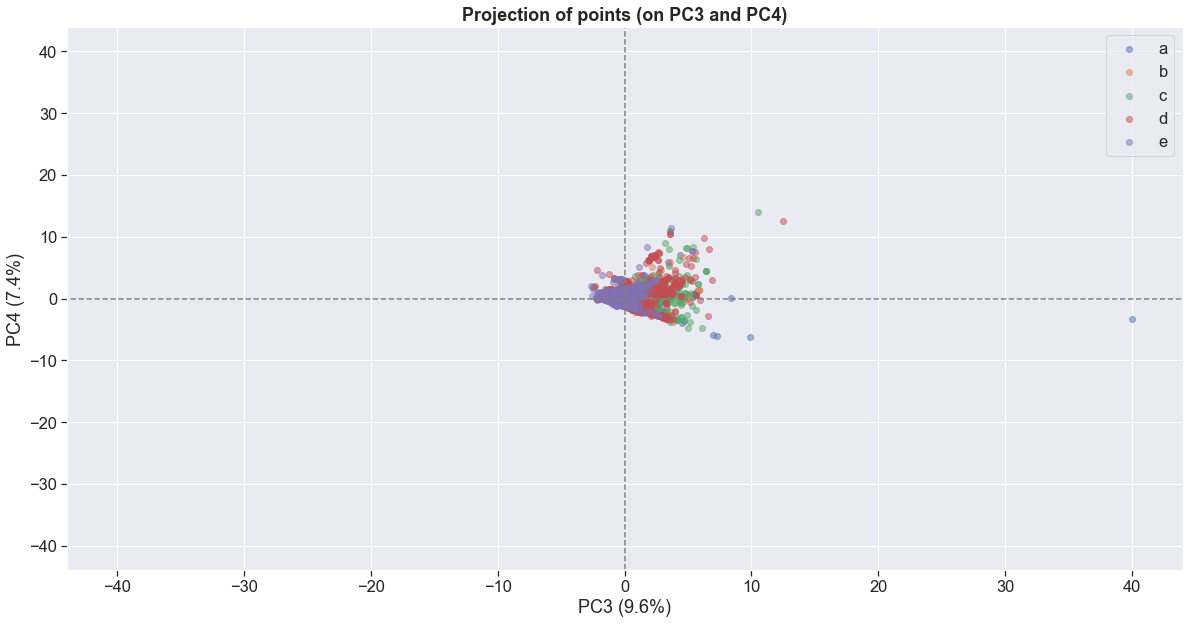

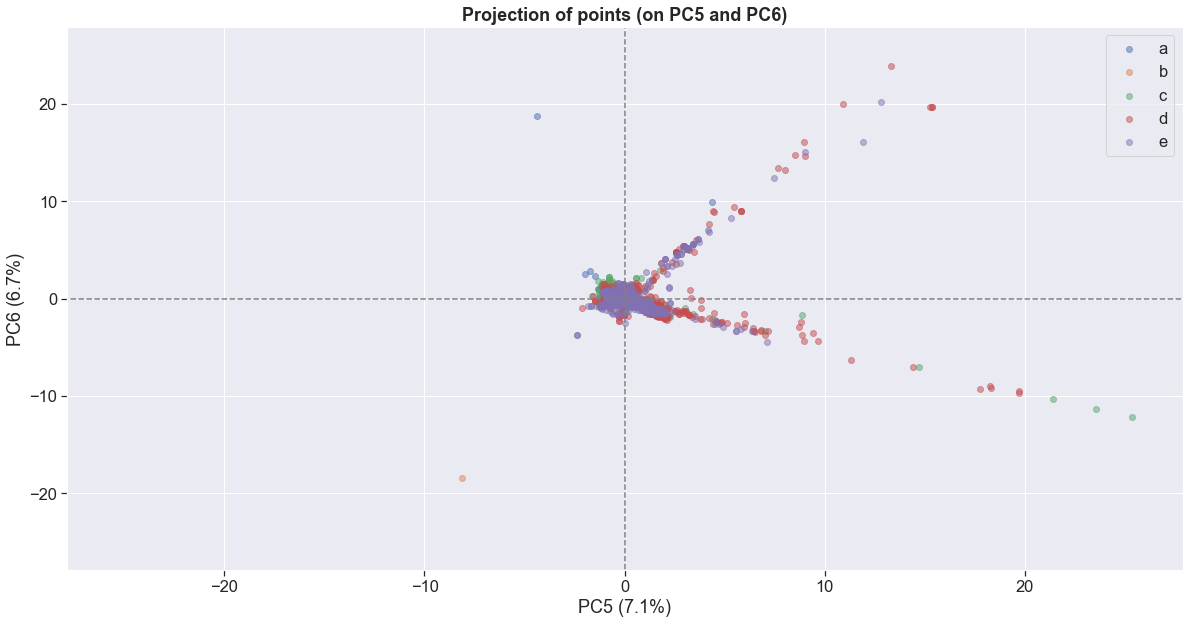

In [131]:
display_factorial_planes(X_projected = pca.transform(X_scaled), n_comp=6, pca=pca, 
                         axis_ranks=[(0,1),(2,3),(4,5)], labels=None, alpha=0.5, illustrative_var=rank_band)

## Modélisation 
L'objectif ici est de pouvoir identifier un potentiel de faisabilité à partir de quelques modèles, et de déterminer leur degré de performance.

In [138]:
X = df.iloc[:, 22:-1]
y = df.iloc[:, -1]

In [139]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scale = std_scale.transform(X)

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.20)

In [144]:
#Baseline
from sklearn import linear_model
lr = linear_model.LinearRegression().fit(X_train, y_train)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
R2 = r2_score(y_test, lr.predict(X_test))
R2

0.7401213182208006

In [171]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))
rmse

4.336915675356343

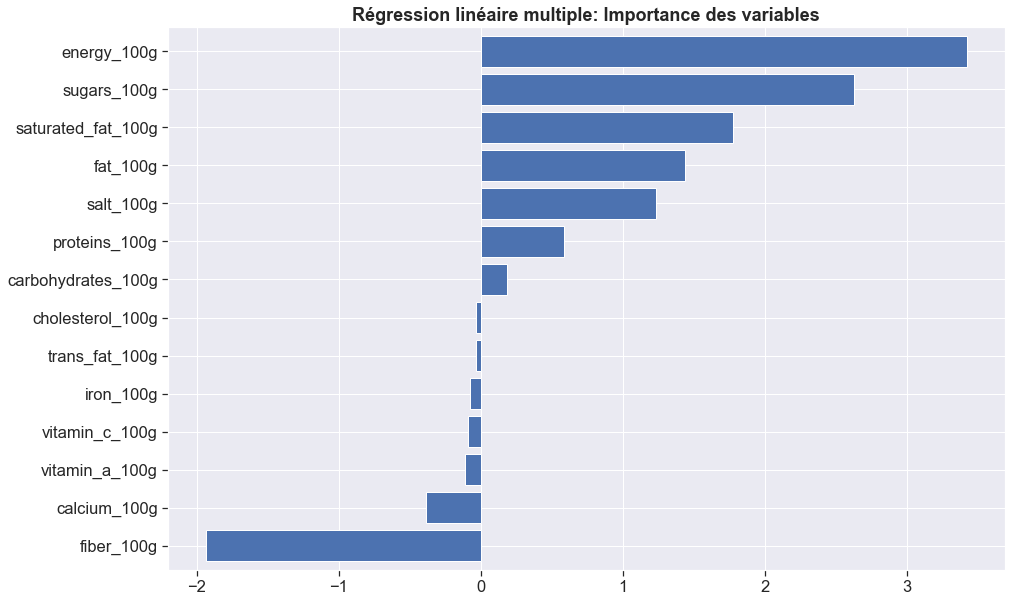

Poids des variables : [ 3.42178065  1.44273927  1.77607301 -0.03545685 -0.03140477  0.18585
  2.63139463 -1.936444    0.58451717  1.23681485 -0.10693723 -0.09172819
 -0.38649502 -0.07412432]


In [146]:
pd.DataFrame(data=lr.fit(X_train, y_train).coef_, index=X.columns, columns=['coef_'])\
.sort_values('coef_', ascending=True).plot(kind='barh', legend=None, width=.8)

plt.title('Régression linéaire multiple: Importance des variables')
plt.savefig('p3_00_graphic/lr_coef_barh.png')
plt.show()

print('Poids des variables : ' + str(lr.fit(X_train, y_train).coef_))

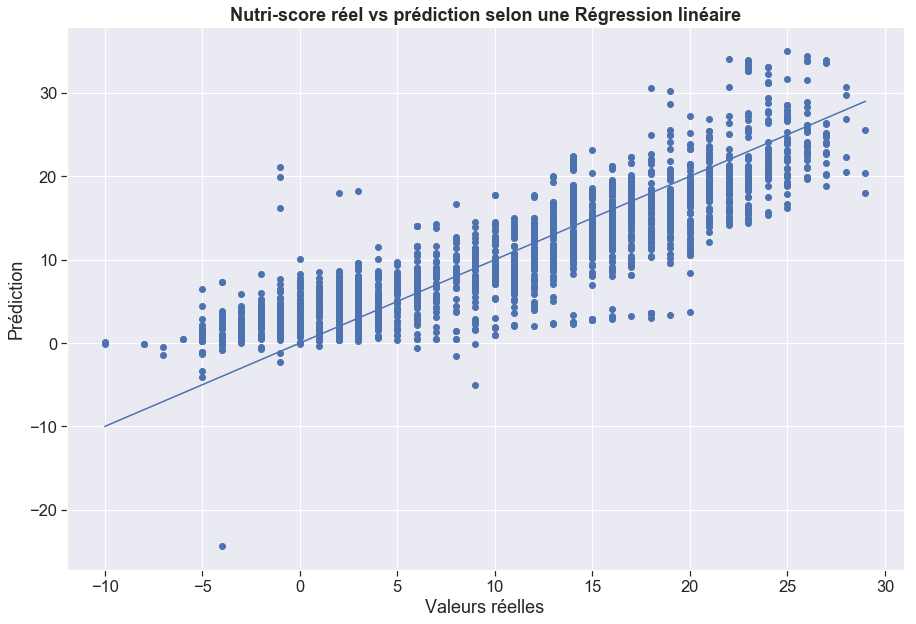

In [153]:
plt.scatter(y_test, lr.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])

plt.title('Nutri-score réel vs prédiction selon une Régression linéaire')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédiction')

plt.savefig('p3_00_graphic/plot_lr_real_prediction.png')
plt.show()

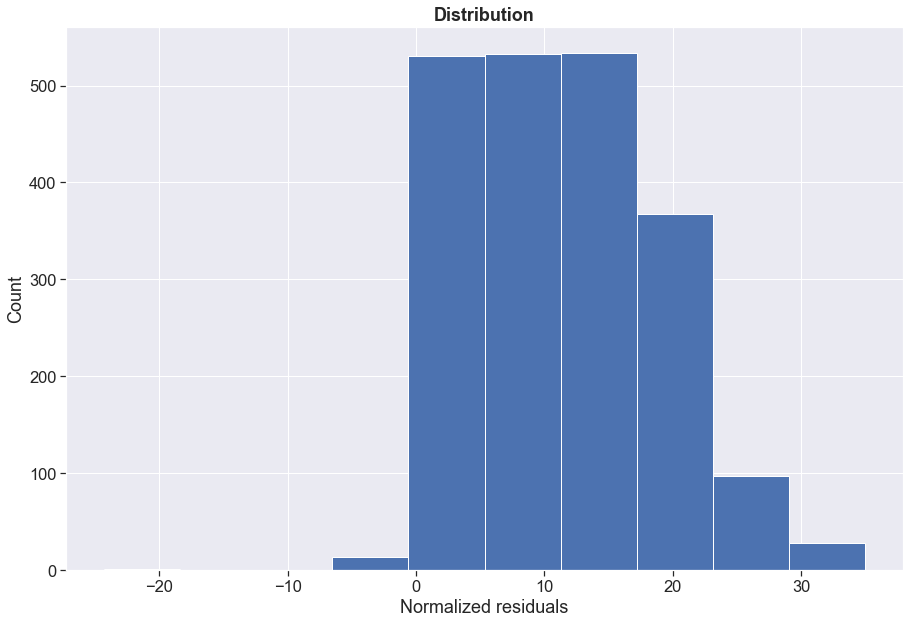

In [148]:
residus = lr.predict(X_test)
plt.hist(residus)
plt.title('Distribution')
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.show()

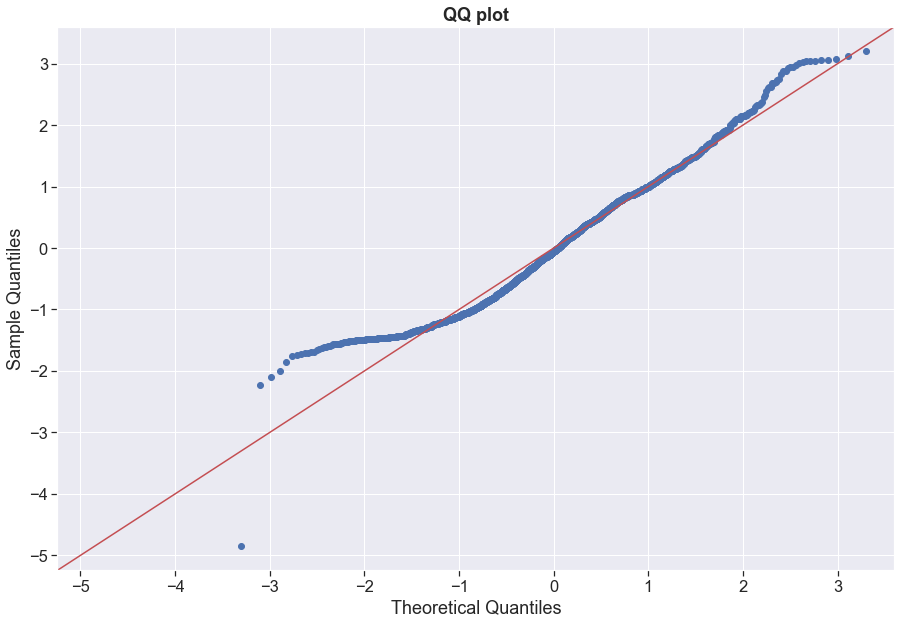

In [149]:
import statsmodels.api as sm
import scipy.stats as stats
residus_std = residus/np.sqrt(sum(residus**2)/(len(residus)-1))
fig = sm.qqplot(residus_std, stats.t, fit=True,line='45')
plt.title("QQ plot")
plt.show()

### Application de la régression ridge

In [154]:
ridgecv = linear_model.RidgeCV(cv=5)
ridgecv = ridgecv.fit(X_train, y_train)
ridgecv

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [172]:
R2 = r2_score(y_test, ridgecv.predict(X_test))
R2

0.7401210066059167

In [173]:
ridgecv_rmse = (np.sqrt(metrics.mean_squared_error(y_test, ridgecv.predict(X_test))))
ridgecv_rmse

4.336918275506267

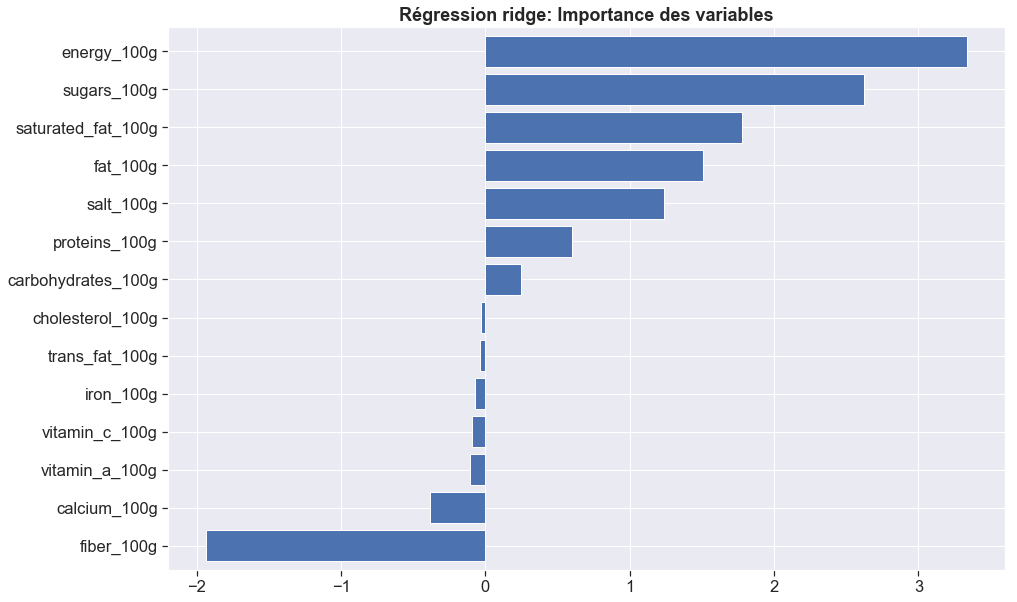

Poids des variables : [ 3.33321523  1.50531673  1.77529426 -0.03489702 -0.03137564  0.24997995
  2.6247772  -1.93771693  0.59844988  1.23574217 -0.10710011 -0.0916452
 -0.38531098 -0.07422121]


In [155]:
pd.DataFrame(data=ridgecv.coef_, index=X.columns, columns=['coef_'])\
.sort_values('coef_', ascending=True).plot(kind='barh', legend=None, width=.8)

plt.title('Régression ridge: Importance des variables')
plt.savefig('p3_00_graphic/ridge_coef_barh.png')
plt.show()

print('Poids des variables : ' + str(ridgecv.coef_))

### Application du lasso

In [158]:
lassocv = linear_model.LassoCV(n_alphas=200, cv=5)
lassocv = lassocv.fit(X_train, y_train)
lassocv

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [174]:
R2 = r2_score(y_test, lassocv.predict(X_test))
R2

0.739702851137697

In [175]:
lassocv_rmse = (np.sqrt(metrics.mean_squared_error(y_test, lassocv.predict(X_test))))
lassocv_rmse

4.340406008689689

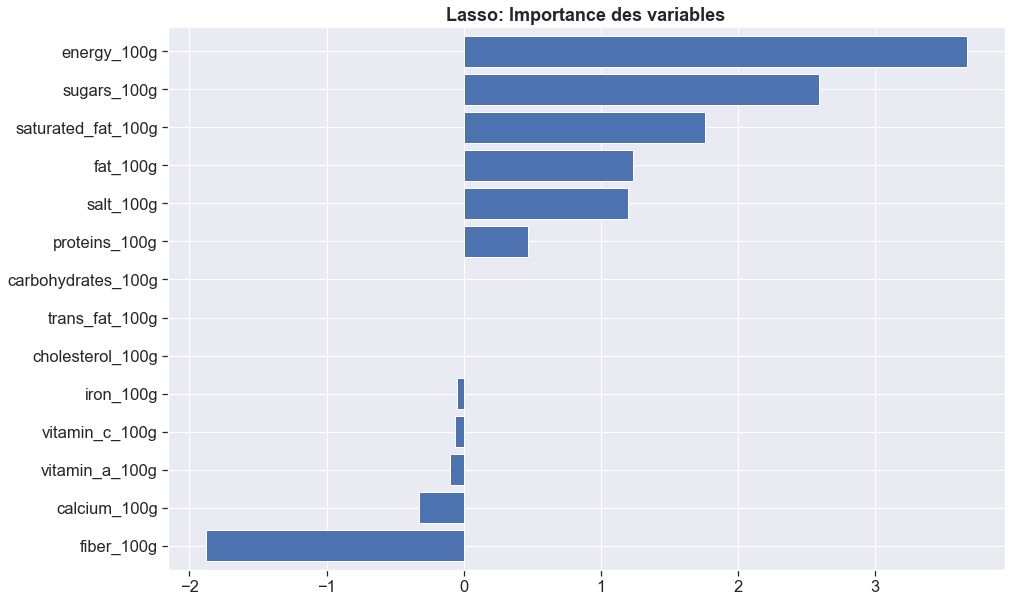

Poids des variables : [ 3.67100870e+00  1.23863329e+00  1.75987236e+00 -0.00000000e+00
 -5.21001699e-06  0.00000000e+00  2.59227077e+00 -1.88228540e+00
  4.74126478e-01  1.20191957e+00 -9.65361090e-02 -6.37876781e-02
 -3.23249031e-01 -4.97534825e-02]


In [159]:
pd.DataFrame(data=lassocv.coef_, index=X.columns, columns=['coef_'])\
.sort_values('coef_', ascending=True).plot(kind='barh', legend=None, width=.8)

plt.title('Lasso: Importance des variables')
plt.savefig('p3_00_graphic/lasso_coef_barh.png')
plt.show()

print('Poids des variables : ' + str(lassocv.coef_))

### Régression Forêts aléatoires
Recherche d'hyperparamètre par validation croisée avec la méthode GridSearchCV (sklearn.model_selection.GridSearchCV).

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr_params = {'n_estimators': [600], 'max_features': ['auto'], 'n_jobs': [-1],
              'random_state': [42],'max_depth': [None]}

CV_rfc = GridSearchCV(RandomForestRegressor(), param_grid=rfr_params , cv=5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None], 'max_featu

In [164]:
CV_rfc.best_estimator_.feature_importances_

array([1.27931033e-01, 3.37579459e-02, 4.55392091e-01, 1.03315777e-04,
       1.66443703e-03, 8.78025975e-03, 1.61704044e-01, 3.98274033e-02,
       1.40990933e-02, 1.38812285e-01, 3.46788904e-03, 4.97518145e-03,
       4.83566097e-03, 4.64935990e-03])

In [177]:
R2 = r2_score(y_test, CV_rfc.predict(X_test))
R2

0.9786062118865214

In [165]:
rfr_rmse = (np.sqrt(metrics.mean_squared_error(y_test, CV_rfc.best_estimator_.predict(X_test))))
rfr_rmse

1.2443412422649331

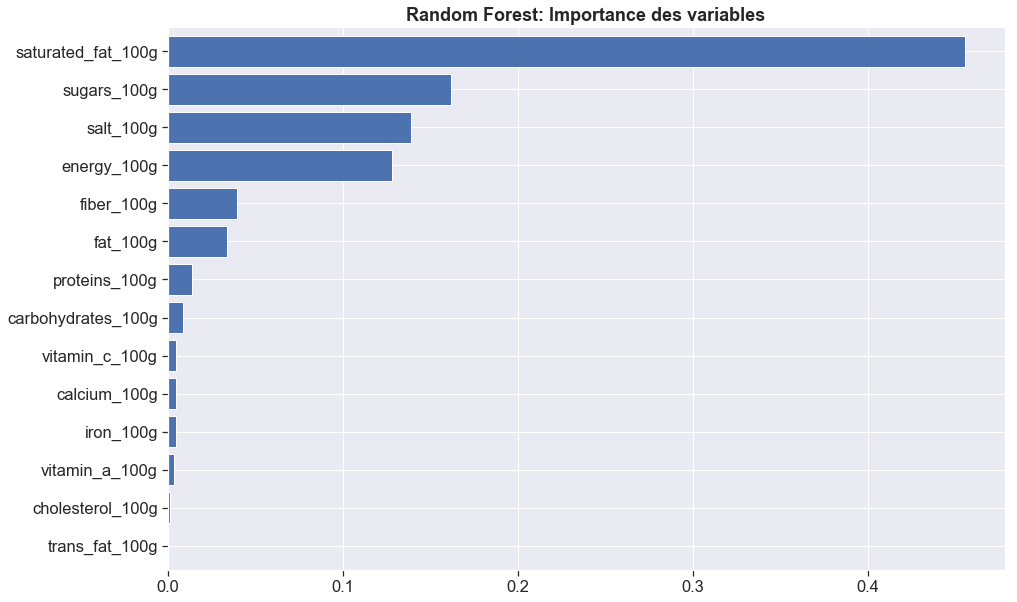

Poids des variables : [1.27931033e-01 3.37579459e-02 4.55392091e-01 1.03315777e-04
 1.66443703e-03 8.78025975e-03 1.61704044e-01 3.98274033e-02
 1.40990933e-02 1.38812285e-01 3.46788904e-03 4.97518145e-03
 4.83566097e-03 4.64935990e-03]


In [166]:
pd.DataFrame(data=CV_rfc.best_estimator_.feature_importances_, index=X.columns, columns=['coef_'])\
.sort_values('coef_', ascending=True).plot(kind='barh', legend=None, width=.8)

plt.title('Random Forest: Importance des variables')
#plt.savefig('p3_00_graphic/lasso_coef_barh.png')
plt.show()

print('Poids des variables : ' + str(CV_rfc.best_estimator_.feature_importances_))

**Les premiers essais de modélisation sont satisfaisants et viennent appuyer les précédentes analyses sur la pertinence des données. L'idée d'application simplifié est donc réalisable, le consommateur pourrait bénéficier d'un double affichage lui permettant d'avoir une idée relativement précise du type d'aliment qu'il consomme.**